# **1. Data 전처리**


In [1]:
# import necessary library

# For Data
import pandas as pd
import numpy as np

# For Visualization (for graph)
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load 'vgames2.csv'

# data_url = './vgames2.csv'
data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv'
df = pd.read_csv(data_url, index_col=0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
# Check the 'null' data
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# Check the data info
df.info()

# < To-do list >
# 1) delete rows including 'null'
# 2) change dtype
#  - 'Year': float64 -> datetime
#  - 'NA_Sales': object -> float
#  - 'EU_Sales': object -> float
#  - 'JP_Sales': object -> float
#  - 'Other_Sales': object -> float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 1) delete rows including 'null'
df2 = df.copy()
df2 = df2.dropna(axis=0)
print('the number of deleted rows: {}'.format(df.shape[0] - df2.shape[0]))
print('the percentage of deleted rows out of total data: {}%'.format(round((df.shape[0] - df2.shape[0])/df.shape[0]*100, 2)))
df2
# result : 16598 rows -> 16241 rows (-357 rows)

the number of deleted rows: 357
the percentage of deleted rows out of total data: 2.15%


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
df2.describe()

,Year
count,16241.000000
mean,1994.178437
std,155.484265
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [7]:
# 2-1) change dtype : Year (float -> datetime)

print(df2[df2['Year'] < 1000][['Name', 'Year']].head(3))

# Release of Age of Empires III: Complete Collection = 9 -> 2009 (https://www.amazon.com/Age-Empires-III-Complete-Collection-Pc/dp/B002MUO6CE)
# Release of Tresures of the Deep = 97 -> 1997 (https://en.wikipedia.org/wiki/Treasures_of_the_Deep)
# Release of NASCAR Unleashed = 11 -> 2011 (https://en.wikipedia.org/wiki/NASCAR_Unleashed)

                                        Name  Year
75   Age of Empires III: Complete Collection   9.0
82                     Treasures of the Deep  97.0
214                         NASCAR Unleashed  11.0


In [8]:
print('the minimum value of 2 digits year :', df2[df2['Year'] > 50]['Year'].min())
print('the minimum value of 4 digits year :', df2[df2['Year'] > 1000]['Year'].min())
print('the maximum value of 4 digits year :', df2[df2['Year'] > 1000]['Year'].max())

# The Range of Year : 1980 - 2020

the minimum value of 2 digits year : 86.0
the minimum value of 4 digits year : 1980.0
the maximum value of 4 digits year : 2020.0


In [9]:
import datetime

def float_to_date(value):
    
    if value >= 80 and value <= 99:
        value += 1900
    elif value >= 0 and value <= 20:
        value += 2000

    return datetime.datetime.strptime(str(int(value)), '%Y').strftime('%Y')

df2['Year'] = df2['Year'].apply(float_to_date)

df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
# 2-2) change dtype : XX_Sales (object -> float)

df2['NA_Sales'].unique()
df2.head(20)

# XX_sales unit = in millions (https://www.kaggle.com/gregorut/videogamesales)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01


In [11]:
def obj_to_float(value):

    if value[-1] == 'M':
        return float(value[:-1])
    elif value[-1] == 'K':
        return float(value[:-1])/1000
    else:
        return float(value)

for col in df2.columns[-4:]:
    df2[col] = df2[col].apply(obj_to_float)

df2.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
6,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
8,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
9,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [12]:
df2.info()
print()
print('### unique ###')
print('Platform :', len(df2['Platform'].unique()))
print('Genre :', len(df2['Genre'].unique()))
print('Publisher :', len(df2['Publisher'].unique()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  object 
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB

### unique ###
Platform : 31
Genre : 12
Publisher : 575



---

# **2. Data Analysis**

*   지역에 따라서 선호하는 게임 장르가 다를까
*   연도별 게임의 트렌드가 있을까
*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스
*   +@ (Free topic)



In [13]:
df2['All_Sales'] = df2['NA_Sales'] + df2['EU_Sales'] + df2['JP_Sales'] + df2['Other_Sales']
df2['Sales_Rank'] = df2['All_Sales'].rank(method='min', ascending=False)
df2 = df2.sort_values(by=['Sales_Rank']).reset_index(drop=True)
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16236,Arabians Lost: The Engagement on Desert,PSP,2012,Adventure,Quinrose,0.00,0.00,0.01,0.00,0.01,15484.0
16237,Robopon 2: Cross Version,GBA,2001,Role-Playing,Hudson Entertainment,0.01,0.00,0.00,0.00,0.01,15484.0
16238,Command & Conquer 3: Kane's Wrath,PC,2008,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,15484.0
16239,Serious Sam II,PC,2005,Shooter,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,15484.0



---

*   지역에 따라 선호하는 게임 장르는 어떤가?

---


In [14]:
df2_1 = df2[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'All_Sales']].groupby(by=['Genre']).sum()
df2_1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


In [15]:
df2_1.sum()
df2_1_per = df2_1.copy()
for region in df2_1_per.columns:
    all = df2_1[region].sum()
    df2_1_per[region] = df2_1_per[region].apply(lambda x: x/all*100)
df2_1_per

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
Genre,,,,,
Action,19.938287,21.459159,12.317228,23.486986,19.564907
Adventure,2.363340,2.659626,4.079787,2.131815,2.672874
Fighting,5.116043,4.173682,6.853916,4.614678,5.065920
Misc,9.164763,8.696215,8.194181,9.272757,8.905392
Platform,10.340744,8.382040,10.266716,6.567778,9.456939
Puzzle,2.822820,2.108566,4.423505,1.588011,2.749513
Racing,8.235354,9.818806,4.429797,9.766777,8.252650
Role-Playing,7.400906,7.649244,26.972841,7.241789,10.296652
Shooter,13.338163,12.960975,3.003012,13.002796,11.704246


In [16]:
df2_1_per.T

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,19.938287,2.363340,5.116043,9.164763,10.340744,2.822820,8.235354,7.400906,13.338163,4.212406,15.492310,1.574863
EU_Sales,21.459159,2.659626,4.173682,8.696215,8.382040,2.108566,9.818806,7.649244,12.960975,4.720564,15.498607,1.872517
JP_Sales,12.317228,4.079787,6.853916,8.194181,10.266716,4.423505,4.429797,26.972841,3.003012,4.997680,10.599423,3.861915
Other_Sales,23.486986,2.131815,4.614678,9.272757,6.567778,1.588011,9.766777,7.241789,13.002796,3.998111,16.894954,1.433550
All_Sales,19.564907,2.672874,5.065920,8.905392,9.456939,2.749513,8.252650,10.296652,11.704246,4.446186,14.909022,1.975702


지역/장르에 따른 판매량


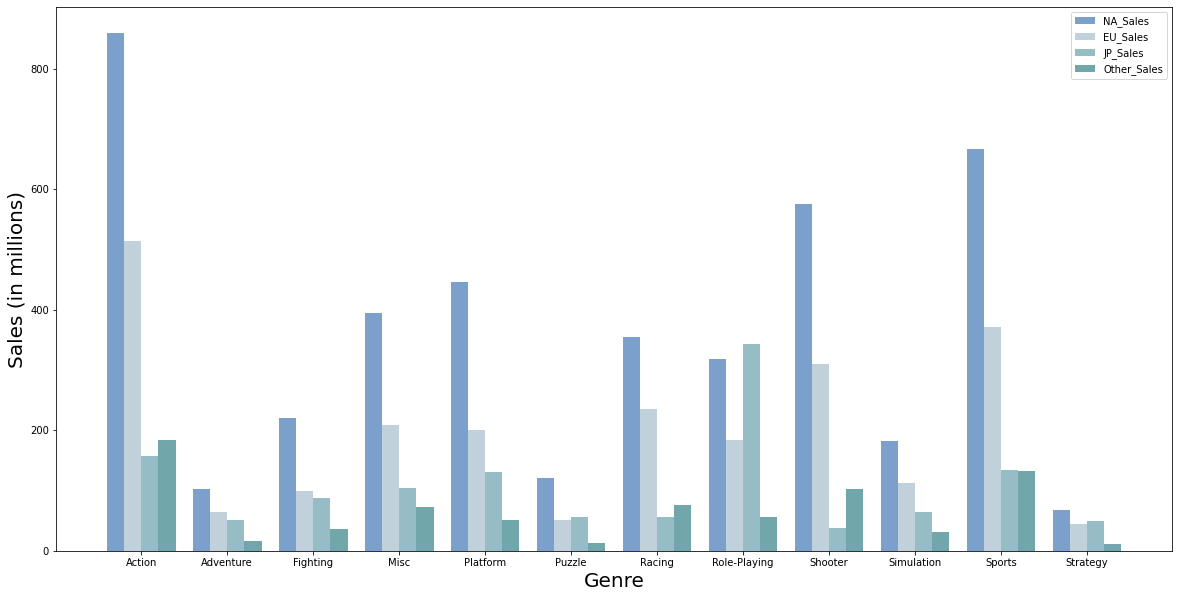

In [17]:
print('지역/장르에 따른 판매량')
color_set_ = ['#7aa0cb', '#c1d1db', '#96bdc6', '#71A6AA']

plt.figure(figsize=(20, 10))
x = np.arange(12)
width = 0.2
widths = [-0.3, -0.1, 0.1, 0.3]

for gap, region, c in zip(widths, df2_1_per.columns, color_set_):
    plt.bar(x+gap, df2_1[region], width, color=c, label=region)

#plt.title('Ratio of Sales by Genre to Total Sales by Region (Year 1980 ~ 2020 combined)', fontsize=24, pad=20)
plt.xticks(x, df2_1.index.tolist())
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Sales (in millions)', fontsize=20)
plt.legend()
plt.show()


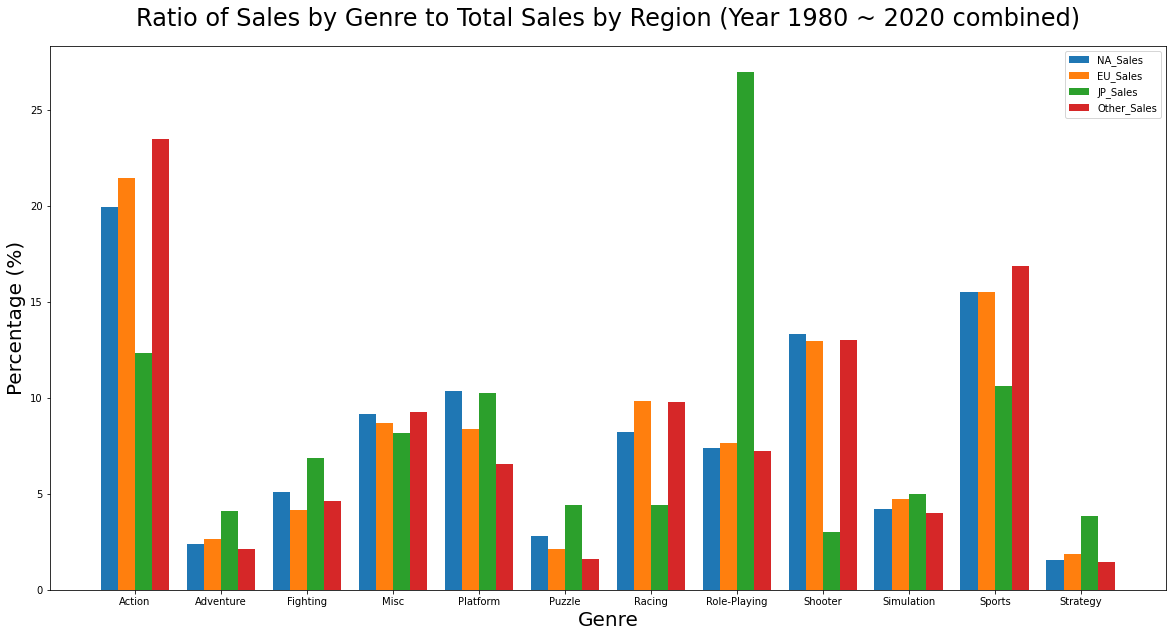

In [18]:

#plt.title('the Sales by Regions', fontsize=28, pad=20)

plt.figure(figsize=(20, 10))
x = np.arange(12)
width = 0.2
widths = [-0.3, -0.1, 0.1, 0.3]

for gap, region in zip(widths, df2_1_per.columns):
    plt.bar(x+gap, df2_1_per[region], width, label=region)

plt.title('Ratio of Sales by Genre to Total Sales by Region (Year 1980 ~ 2020 combined)', fontsize=24, pad=20)
plt.xticks(x, df2_1_per.index.tolist())
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Percentage (%)', fontsize=20)
plt.legend()
plt.show()



In [19]:
df2_1_per2 = df2_1.copy()
df2_1_per2['All_Sales'] = df2_1_per2['NA_Sales']+df2_1_per2['EU_Sales']+df2_1_per2['JP_Sales']+df2_1_per2['Other_Sales']
for col in df2_1_per2.columns[:-1]:
    df2_1_per2[col] = df2_1_per2[col].apply(lambda x: round(x/df2_1_per2['All_Sales']*100, 2))
df2_1_per2

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
Genre,,,,,
Action,50.13,29.99,9.14,10.74,1712.98
Adventure,5.94,3.72,3.03,0.97,234.02
Fighting,12.86,5.83,5.09,2.11,443.54
Misc,23.04,12.15,6.08,4.24,779.70
Platform,26.00,11.71,7.62,3.00,827.99
Puzzle,7.10,2.95,3.28,0.73,240.73
Racing,20.71,13.72,3.29,4.47,722.55
Role-Playing,18.61,10.69,20.02,3.31,901.51
Shooter,33.54,18.11,2.23,5.95,1024.75


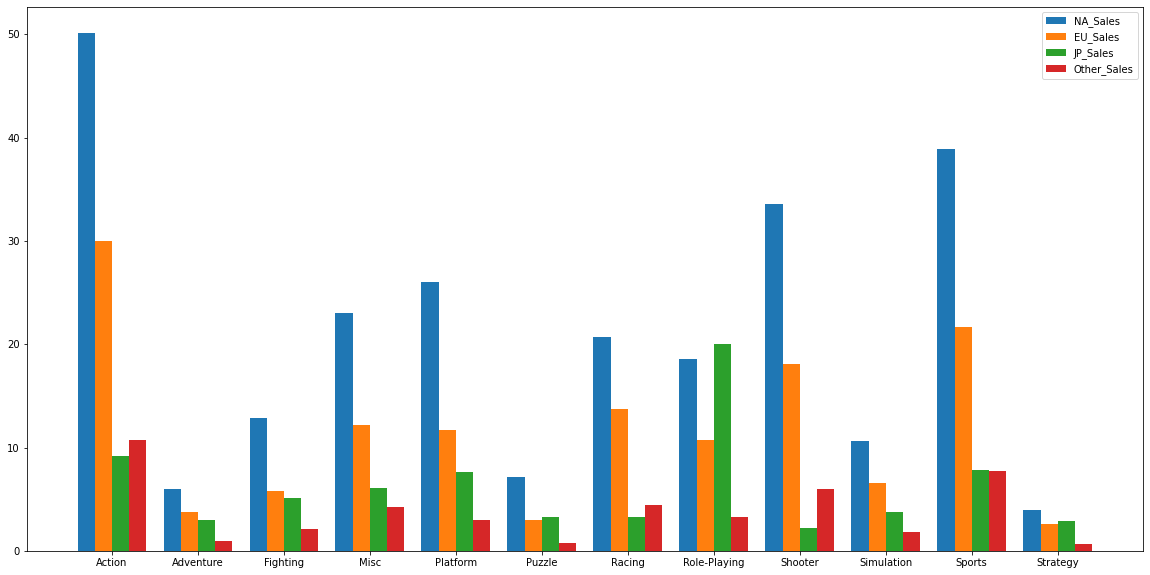

In [20]:
plt.figure(figsize=(20, 10))
x = np.arange(12)
width = 0.2
widths = [-0.3, -0.1, 0.1, 0.3]

for gap, region in zip(widths, df2_1_per2.columns):
    plt.bar(x+gap, df2_1_per2[region], width, label=region)

#plt.title('Ratio of Sales by Genre to Total Sales by Region (Year 1980 ~ 2020 combined)', fontsize=24, pad=20)
plt.xticks(x, df2_1_per.index.tolist())
#plt.xlabel('Genre', fontsize=20)
#plt.ylabel('Percentage (%)', fontsize=20)
plt.legend()
plt.show()

In [21]:
for col in df2_1_per.columns:
    print('{}: {}'.format(col, df2_1_per[col].sort_values(ascending=False).head(5)))

NA_Sales: Genre
Action      19.938287
Sports      15.492310
Shooter     13.338163
Platform    10.340744
Misc         9.164763
Name: NA_Sales, dtype: float64
EU_Sales: Genre
Action     21.459159
Sports     15.498607
Shooter    12.960975
Racing      9.818806
Misc        8.696215
Name: EU_Sales, dtype: float64
JP_Sales: Genre
Role-Playing    26.972841
Action          12.317228
Sports          10.599423
Platform        10.266716
Misc             8.194181
Name: JP_Sales, dtype: float64
Other_Sales: Genre
Action     23.486986
Sports     16.894954
Shooter    13.002796
Racing      9.766777
Misc        9.272757
Name: Other_Sales, dtype: float64
All_Sales: Genre
Action          19.564907
Sports          14.909022
Shooter         11.704246
Role-Playing    10.296652
Platform         9.456939
Name: All_Sales, dtype: float64


['Action', 'Sports', 'Role-Playing', 'Shooter', 'Platform', 'Misc', 'Racing']


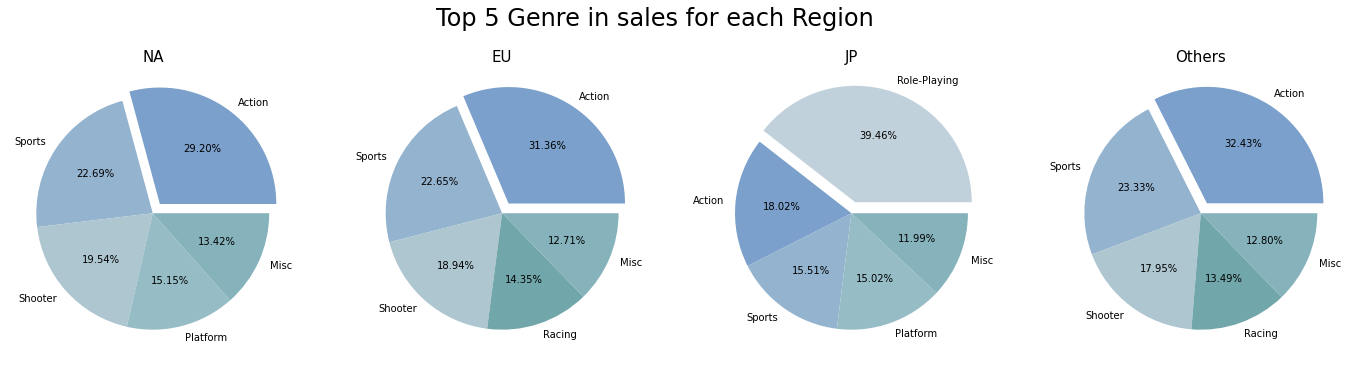

In [22]:
color_B = {'Action': '#1f77b4',
          'Sports': '#ff7f0e',
          'Shooter': '#2ca02c',
          'Platform': '#d62728',
          'Misc': '#9467bd',
          'Racing': '#8c564b',
          'Role-Playing': '#e377c2'}

color = {'Action': '#222222',
          'Sports': '#3b3b3b',
          'Shooter': '#515151',
          'Role-Playing': '#626262',
          'Platform': '#7e7e7e',
          'Misc': '#9e9e9e',
          'Racing': '#b1b1b1'}

f_color = {'Action': '#FFFFFF',
           'Sports': '#FFFFFF',
           'Shooter': '#FFFFFF',
           'Role-Playing': '#FFFFFF',
           'Platform': '#000000',
           'Misc': '#000000',
           'Racing': '#000000'}

top7 = df2_1_per.sum(axis=1).sort_values(ascending=False).head(7).index.tolist()
print(top7)
color_set = ['#7aa0cb', '#93b3cf', '#c1d1db', '#aec6cf', '#96bdc6', '#85b2bb', '#71A6AA']
color1 = {g:c for g, c in zip(top7, color_set)}


regions = ['NA', 'EU', 'JP', 'Others']

plt.figure(figsize=(24,6))
plt.suptitle('Top 5 Genre in sales for each Region', fontsize=24)
for i, col in enumerate(df2_1_per.columns[:-1]):
    plt.subplot(1, 4, i+1)
    plt.title(regions[i], fontsize=15)
    df_pie = df2_1_per[col].sort_values(ascending=False).head(5)
    cols = [color1[val] for val in df_pie.index]
    fcols = [f_color[val] for val in df_pie.index]
    _, _, autotexts = plt.pie(df_pie, explode = (0.1,0,0,0,0), colors=cols, labels = df_pie.index, autopct='%1.2f%%')
    #for i, ins in enumerate(autotexts):
    #    ins.set_color(f_color[df_pie.index[i]])

plt.show()




---

*  연도별 게임의 트렌드가 있을까

---


In [23]:
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16236,Arabians Lost: The Engagement on Desert,PSP,2012,Adventure,Quinrose,0.00,0.00,0.01,0.00,0.01,15484.0
16237,Robopon 2: Cross Version,GBA,2001,Role-Playing,Hudson Entertainment,0.01,0.00,0.00,0.00,0.01,15484.0
16238,Command & Conquer 3: Kane's Wrath,PC,2008,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,15484.0
16239,Serious Sam II,PC,2005,Shooter,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,15484.0


In [38]:
df2[df2['Publisher']=='Take-Two Interactive']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,17.0
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,18.0
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,24.0
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,25.0
37,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,38.0
...,...,...,...,...,...,...,...,...,...,...,...
15634,Stronghold Legends,PC,2006,Strategy,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,15484.0
15675,NHL 2K7,XB,2006,Sports,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01,15484.0
15897,World Poker Tour,GBA,2005,Misc,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01,15484.0
16008,Grand Theft Auto III,PC,2002,Action,Take-Two Interactive,0.00,0.01,0.00,0.00,0.01,15484.0


In [29]:
df2[df2['Genre']=='Action'].head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,17.0
17,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,18.0
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,24.0
24,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,25.0
37,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,38.0
43,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,44.0
45,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90,46.0
50,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03,51.0
55,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58,56.0
80,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25,81.0


In [32]:
df2[df2['Genre']=='Role-Playing'].head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09,13.0
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35,21.0
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84,26.0
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,27.0
30,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64,31.0
48,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,49.0
57,Pokemon FireRed/Pokemon LeafGreen,GBA,2004,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49,58.0
65,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,66.0
74,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84,75.0


In [40]:
df2[df2['Publisher']=='Nintendo'].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6.0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7.0
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,8.0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,9.0
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,10.0


In [36]:
df2.head(100).groupby(by='Publisher').sum().sort_values(by=['All_Sales'], ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
Publisher,,,,,,
Nintendo,436.10,240.90,170.81,56.99,904.80,2146.0
Activision,91.57,57.61,3.44,20.60,173.22,818.0
Take-Two Interactive,59.69,40.48,3.39,25.59,129.15,362.0
Sony Computer Entertainment,30.42,23.98,15.33,13.43,83.16,496.0
Microsoft Game Studios,49.00,16.47,0.56,5.24,71.27,337.0
Electronic Arts,10.54,22.95,0.47,5.90,39.86,429.0
Ubisoft,11.89,6.04,0.01,1.85,19.79,128.0
Bethesda Softworks,5.03,2.86,0.10,0.85,8.84,75.0
Sega,2.58,3.90,0.66,0.91,8.05,84.0


In [ ]:
|print(df2['NA_Sales'].sum(axis=0))
print(df2['EU_Sales'].sum(axis=0))
print(df2['JP_Sales'].sum(axis=0))
print(df2['Other_Sales'].sum(axis=0))

df2['Platform'].unique()

4307.040000000001
2393.5699999999997
1271.3899999999999
783.37


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
indexes = df2_1_per.sort_values(by=['All_Sales'], ascending=False).head(6).index.tolist()
indexes

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc']

In [ ]:
#df2_year = df2[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'All_Sales']].groupby(by=['Year']).sum()
df2_year = pd.pivot_table(data=df2, index=['Year'], columns=['Genre'], values='All_Sales', aggfunc='sum').fillna(0)
df2_year['all'] = df2_year.sum(axis=1)
df2_year

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,all
Year,,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00,10.88
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00,35.68
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00,28.88
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00,16.80
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00,50.35
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00,53.95
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00,37.08
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00,21.70
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00,47.21


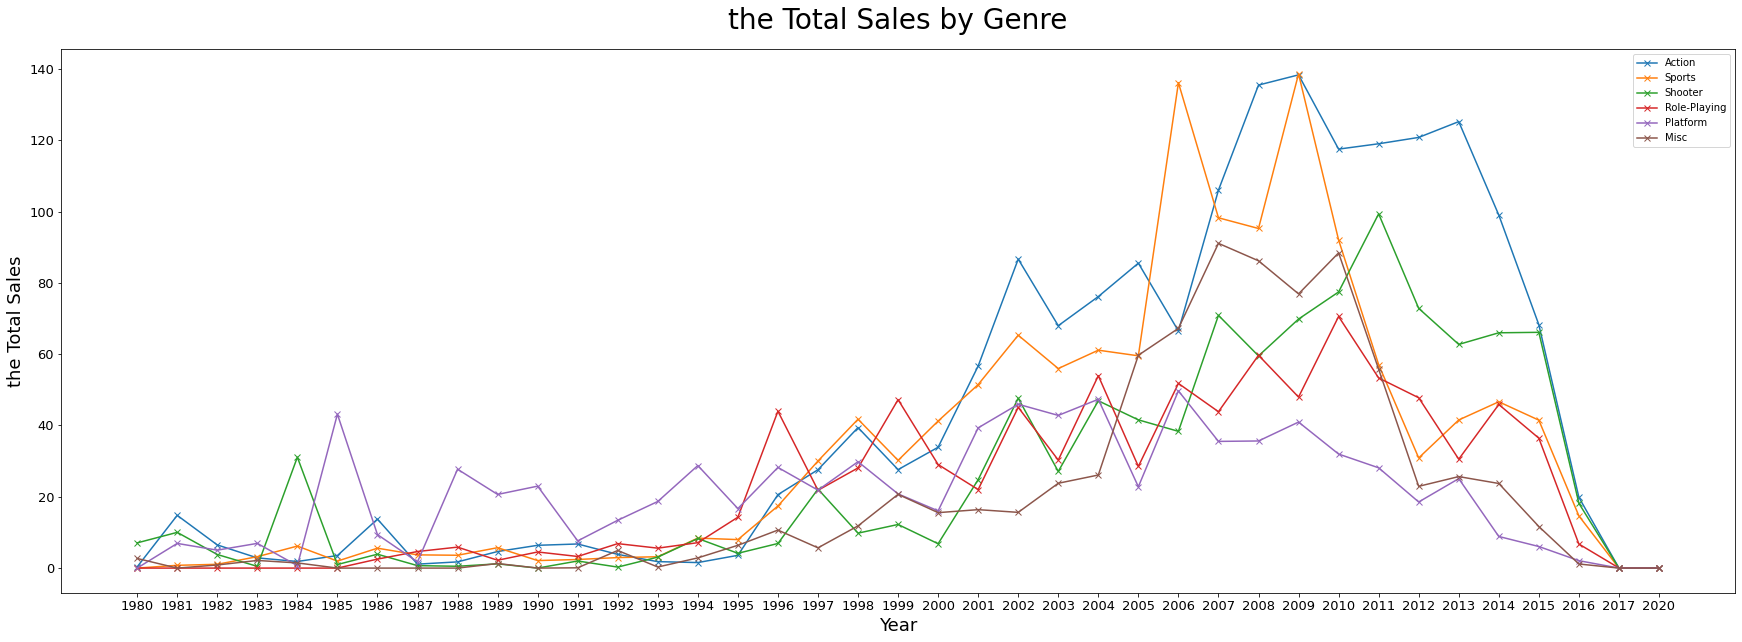

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'darkorchid', 'gray']
plt.figure(figsize=(30, 10))
plt.title('the Total Sales by Genre', fontsize=28, pad=20)
for i, data in enumerate(indexes):
    plt.plot(df2_year.index, df2_year[data], 'x-', color=colors[i], label=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=18)
plt.ylabel('the Total Sales', fontsize=18)
plt.legend()

plt.show()


---

*  출고량이 높은 게임 분석

---


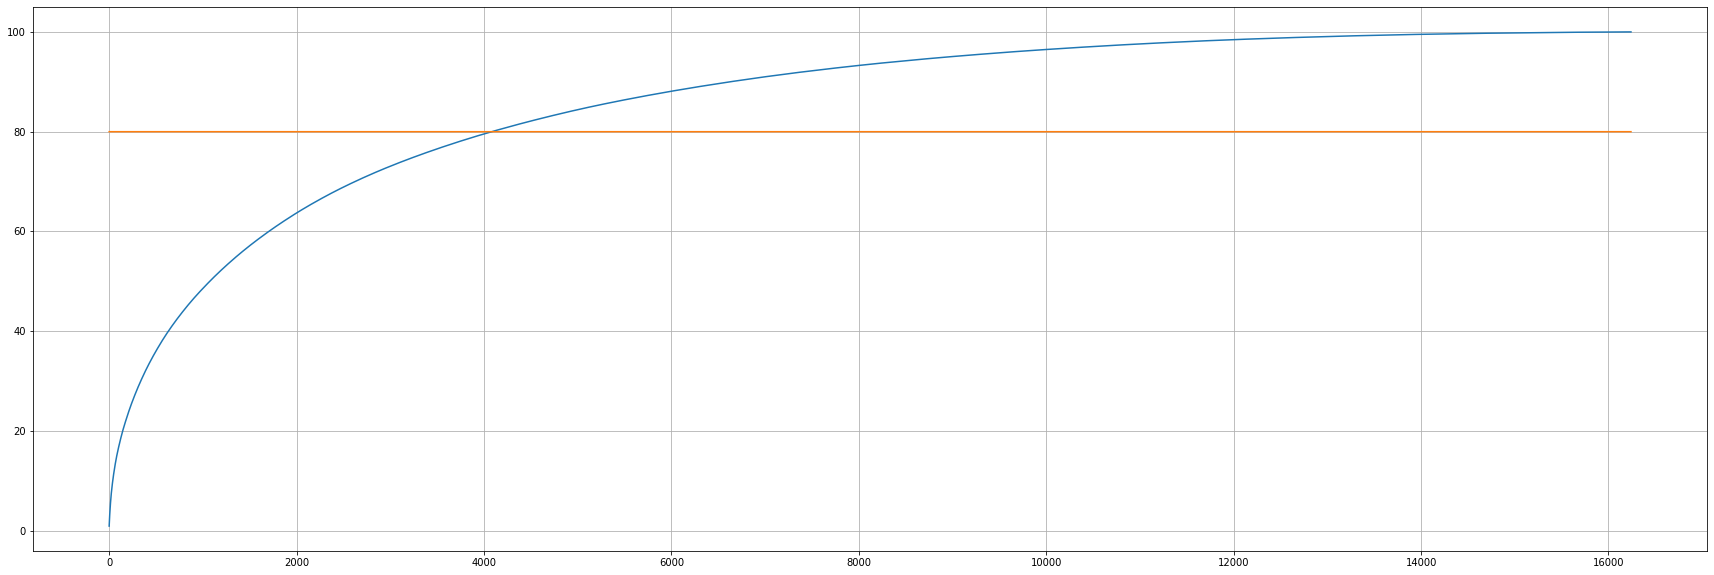

In [57]:
df2['portion'] = (df2['All_Sales']/df2['All_Sales'].sum(axis=0)*100).cumsum()
df2
df2[df2['portion']<10]
#print(df2[df2['All_Sales'] > 7])

plt.figure(figsize=(30, 10))
plt.plot(df2.index, df2['portion'])
plt.plot(df2.index, [80 for _ in df2.index])
plt.grid()
plt.show()

#print(df2.loc[[0, 100, 1000, 2000, 3000, 4000], ['All_Sales', 'Sales_Rank','portion']])



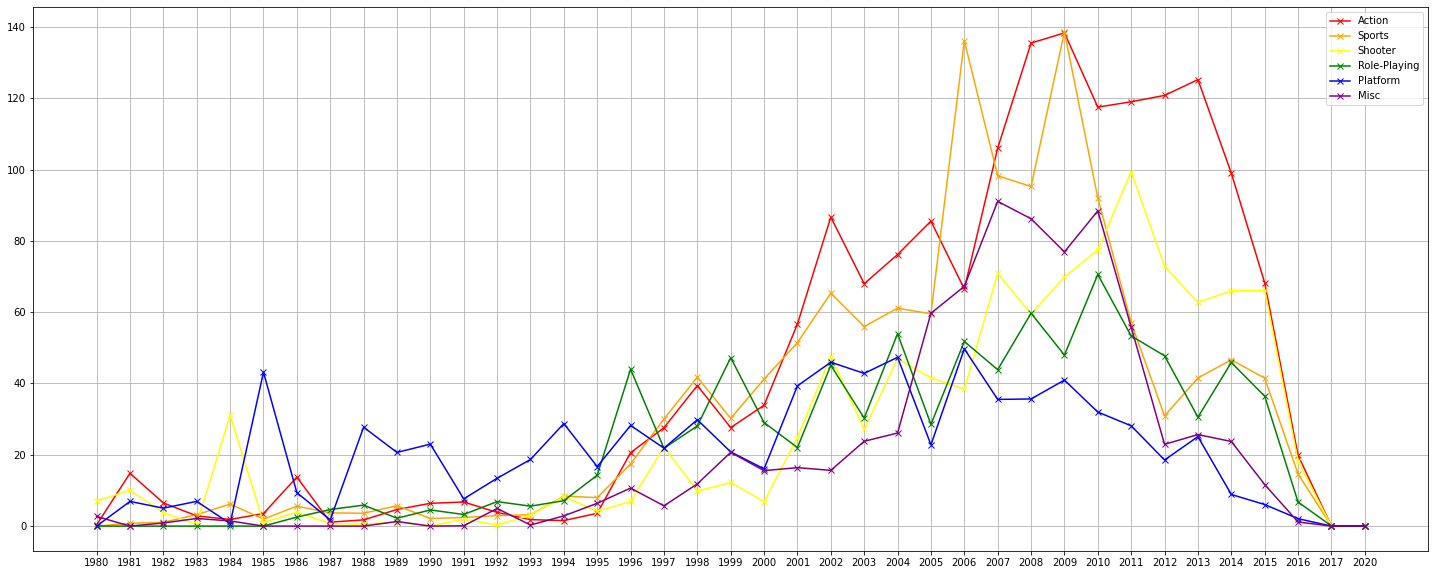

In [ ]:
color2 = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'block']

plt.figure(figsize=(25, 10))
#plt.plot(df2_year.index, df2_year['all'], 'x-')

for i, idx in enumerate(indexes):
    plt.plot(df2_year.index, df2_year[idx], 'x-', color=color2[i], label=idx)
plt.legend()
plt.grid()
plt.show()

In [ ]:
df_top100 = df2.head(100)
df_top100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank,portion
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0,0.945020
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0,1.404624
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,3.0,1.813858
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0,2.190770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,5.0,2.549178
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44,96.0,16.269786
96,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38,97.0,16.354078
97,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34,98.0,16.437912
98,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32,99.0,16.521518


In [ ]:
pd.crosstab(df_top100['Year'], df_top100['Genre']).sum(axis=0)

Genre
Action          13
Adventure        1
Fighting         2
Misc             8
Platform        16
Puzzle           3
Racing          10
Role-Playing    14
Shooter         23
Simulation       4
Sports           6
dtype: int64

In [ ]:
df3 = df_top100.groupby(by=['Genre']).sum().drop(columns=['Sales_Rank', 'portion'])
df3['count'] = pd.crosstab(df_top100['Year'], df_top100['Genre']).sum(axis=0)
df3 = df3.sort_values(by=['All_Sales', 'count'], ascending=False)
df3['sales_per_game'] = df3['All_Sales']/df3['count']
df3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,count,sales_per_game
Genre,,,,,,,
Shooter,160.14,74.37,4.43,25.94,264.88,23,11.516522
Platform,138.08,54.82,46.64,12.40,251.94,16,15.746250
Role-Playing,71.74,50.59,59.41,9.34,191.08,14,13.648571
Sports,78.96,66.61,13.90,17.53,177.00,6,29.500000
Action,73.08,52.38,9.53,29.23,164.22,13,12.632308
Racing,60.21,44.81,24.64,18.28,147.94,10,14.794000
Misc,59.49,36.45,10.92,10.62,117.48,8,14.685000
Simulation,14.61,23.26,11.62,4.75,54.24,4,13.560000
Puzzle,33.92,8.07,9.54,1.84,53.37,3,17.790000


In [ ]:
df2_sort = df2_1.sort_values(by=['All_Sales'], ascending=False)
df2_sort['ratio'] = df2_sort['All_Sales']/df2_sort['All_Sales'].sum(axis=0)*100
df2_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,ratio
Genre,,,,,,
Action,858.75,513.64,156.60,183.99,1712.98,19.564907
Sports,667.26,370.97,134.76,132.35,1305.34,14.909022
Shooter,574.48,310.23,38.18,101.86,1024.75,11.704246
Role-Playing,318.76,183.09,342.93,56.73,901.51,10.296652
Platform,445.38,200.63,130.53,51.45,827.99,9.456939
Misc,394.73,208.15,104.18,72.64,779.70,8.905392
Racing,354.70,235.02,56.32,76.51,722.55,8.252650
Fighting,220.35,99.90,87.14,36.15,443.54,5.065920
Simulation,181.43,112.99,63.54,31.32,389.28,4.446186


['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Misc', 'Racing']


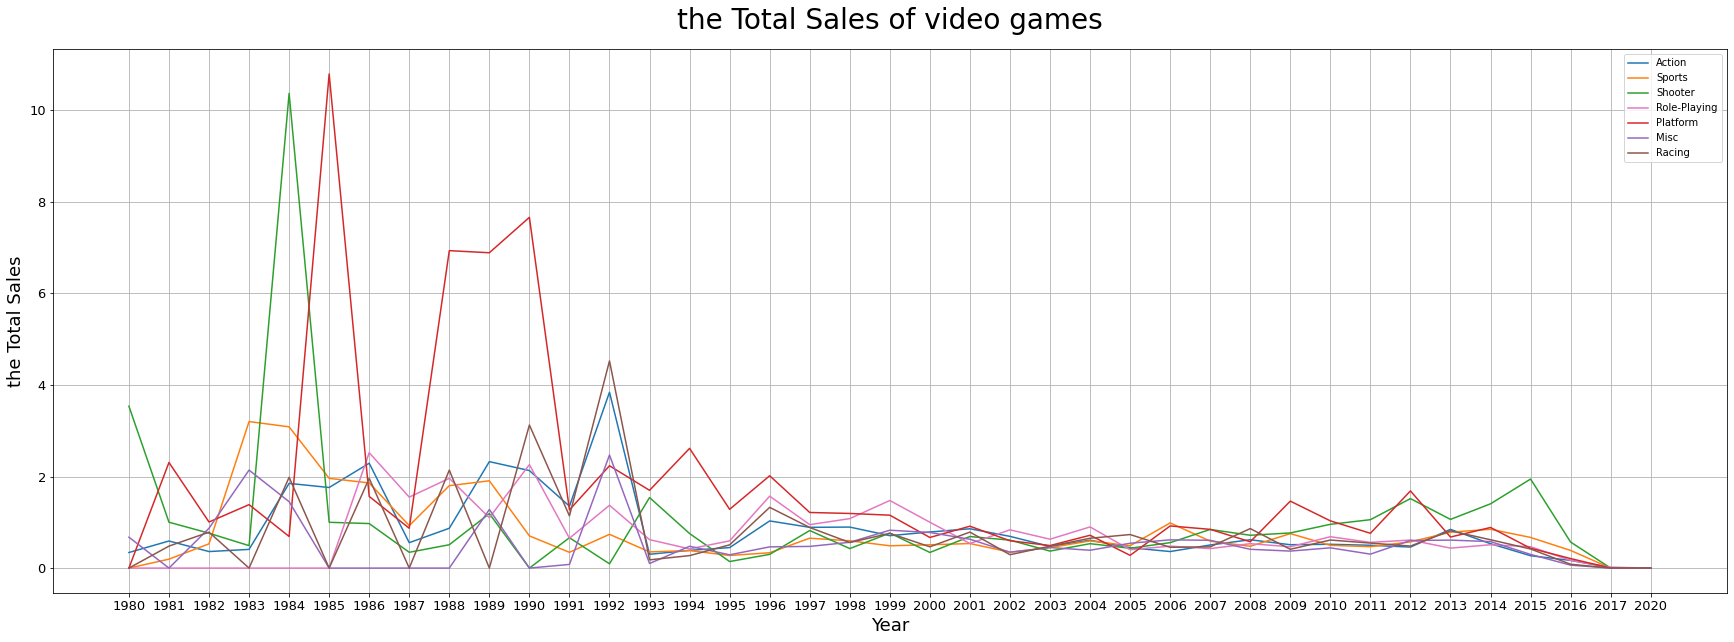

In [ ]:
top7_genre = df2_sort.index[:7].tolist()
print(top7_genre)

plt.figure(figsize=(30, 10))
plt.title('the Total Sales of video games', fontsize=28, pad=20)
for i, gen in enumerate(top7_genre):
    plt.plot(df2_year.index, df2_year[gen], color=color_B[gen], label=gen)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=18)
plt.ylabel('the Total Sales', fontsize=18)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 연도별 게임 장르별 Release 갯수
# 연도별 게임 장르별 판매량

In [ ]:
df_rank.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales,Sales_Rank
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,0.265195,0.147378,0.078283,0.048234,0.539091,7979.814974
std,0.822431,0.508340,0.309272,0.189678,1.563905,4554.635637
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,4021.000000
50%,0.080000,0.020000,0.000000,0.010000,0.170000,8059.000000
75%,0.240000,0.110000,0.040000,0.040000,0.480000,12169.000000
max,41.490000,29.020000,10.220000,10.570000,82.740000,16241.000000


In [ ]:
df_melt_top100 = pd.melt(df_rank[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].head(100), ['Genre'], var_name='Region', value_name='Sales')
df_melt_top100

,Genre,Region,Sales
0,Sports,NA_Sales,41.49
1,Platform,NA_Sales,29.08
2,Racing,NA_Sales,15.85
3,Sports,NA_Sales,15.75
4,Role-Playing,NA_Sales,11.27
...,...,...,...
395,Fighting,Other_Sales,0.43
396,Shooter,Other_Sales,0.69
397,Shooter,Other_Sales,0.69
398,Action,Other_Sales,0.70


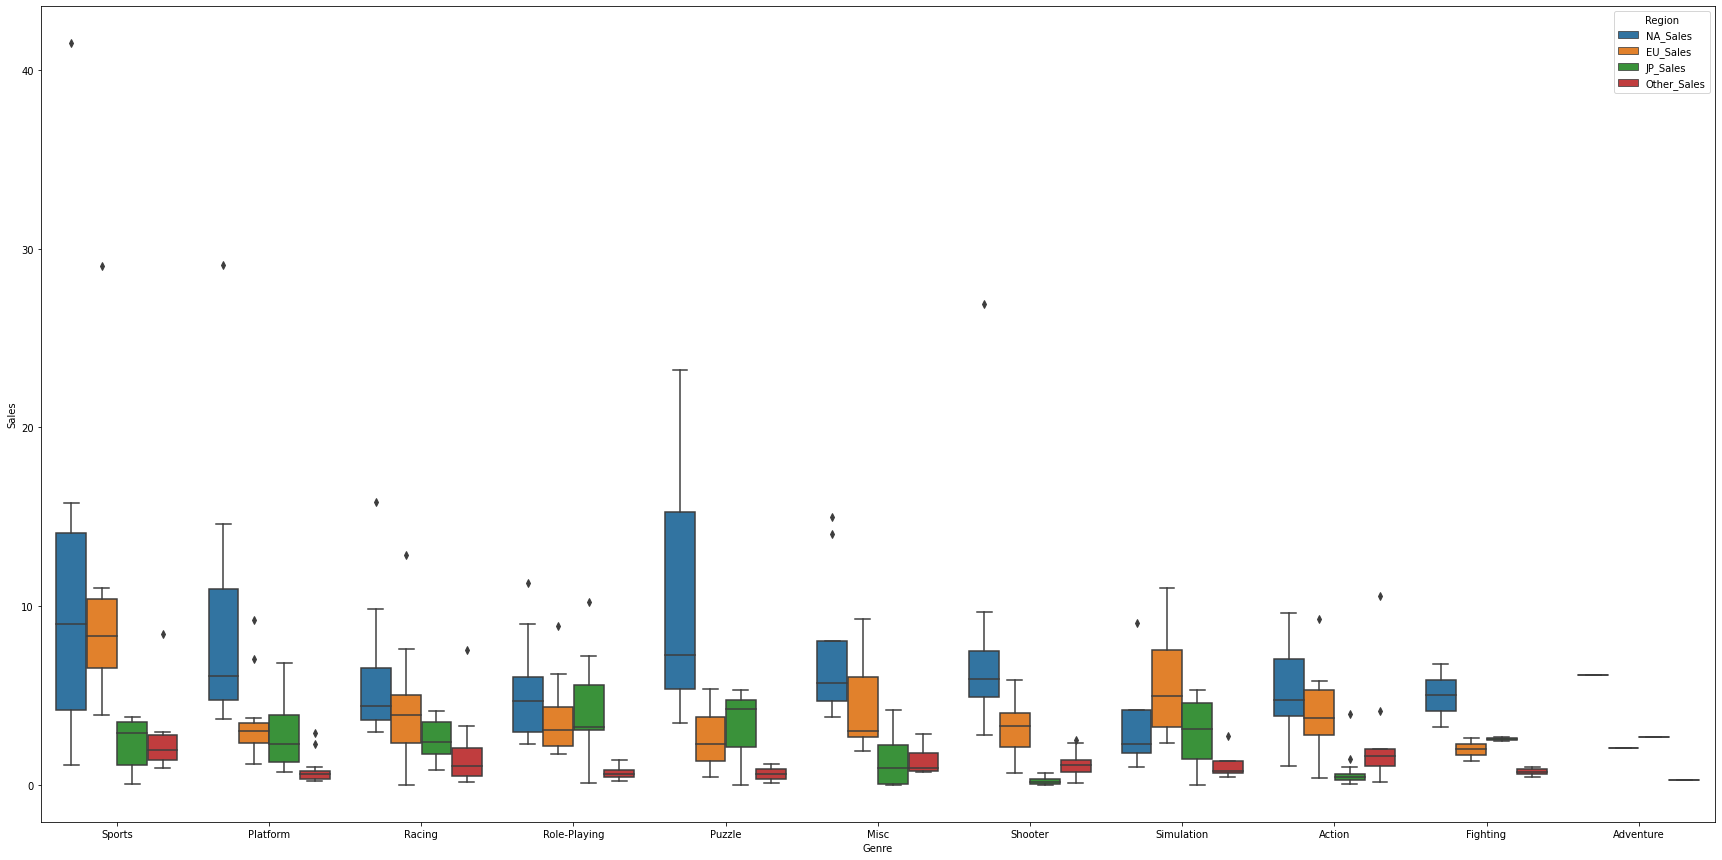

In [ ]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_melt_top100, x='Genre', y='Sales', hue='Region')
plt.show()

In [ ]:
df2.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,0.265195,0.147378,0.078283,0.048234,0.539091
std,0.822431,0.508340,0.309272,0.189678,1.563905
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
print('the number of Genre :', len(df2['Genre'].unique()))
print('Genre :', df2['Genre'].unique())

the number of Genre : 12
Genre : ['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']


In [ ]:
df2_genre = df2.groupby(by=['Genre']).sum()
df2_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
Genre,,,,,
Action,858.75,513.64,156.60,183.99,1712.98
Adventure,101.79,63.66,51.87,16.70,234.02
Fighting,220.35,99.90,87.14,36.15,443.54
Misc,394.73,208.15,104.18,72.64,779.70
Platform,445.38,200.63,130.53,51.45,827.99
Puzzle,121.58,50.47,56.24,12.44,240.73
Racing,354.70,235.02,56.32,76.51,722.55
Role-Playing,318.76,183.09,342.93,56.73,901.51
Shooter,574.48,310.23,38.18,101.86,1024.75


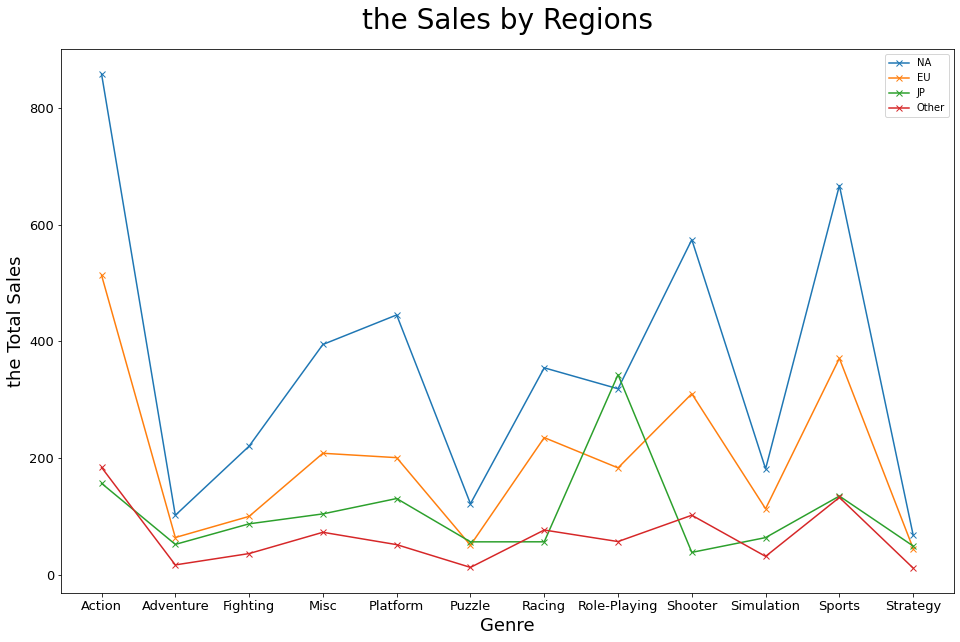

In [ ]:
plt.figure(figsize=(16, 10))
plt.title('the Sales by Regions', fontsize=28, pad=20)
plt.plot(df2_genre.index, df2_genre['NA_Sales'], 'x-', label='NA')
plt.plot(df2_genre.index, df2_genre['EU_Sales'], 'x-', label='EU')
plt.plot(df2_genre.index, df2_genre['JP_Sales'], 'x-', label='JP')
plt.plot(df2_genre.index, df2_genre['Other_Sales'], 'x-', label='Other')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('the Total Sales', fontsize=18)
plt.legend()

plt.show()

In [ ]:
df2_year2 = pd.pivot_table(df2, index=['Year'], columns=['Genre'], values='All_Sales').fillna(0.0)
df2_year2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.340000,0.000000,0.770000,0.675000,0.000000,0.000000,0.000000,0.000000,3.535000,0.000000,0.000000,0.000000
1981,0.591600,0.000000,0.000000,0.000000,2.306667,1.125000,0.480000,0.000000,1.002000,0.440000,0.195000,0.000000
1982,0.361111,0.000000,0.000000,0.870000,1.006000,3.346667,0.785000,0.000000,0.762000,0.000000,0.530000,0.000000
1983,0.408571,0.400000,0.000000,2.140000,1.386000,0.780000,0.000000,0.000000,0.490000,0.000000,3.200000,0.000000
1984,1.850000,0.000000,0.000000,1.450000,0.690000,1.046667,1.983333,0.000000,10.366667,0.000000,3.085000,0.000000
1985,1.760000,0.000000,1.050000,0.000000,10.792500,0.802500,0.000000,0.000000,1.000000,0.040000,1.960000,0.000000
1986,2.290000,0.000000,0.000000,0.000000,1.565000,0.000000,1.960000,2.520000,0.972500,0.000000,1.860000,0.000000
1987,0.555000,4.380000,2.710000,0.000000,0.870000,0.000000,0.000000,1.550000,0.345000,0.000000,0.927500,0.000000
1988,0.870000,0.000000,0.000000,0.000000,6.932500,5.580000,2.140000,1.960000,0.510000,0.030000,1.800000,0.000000


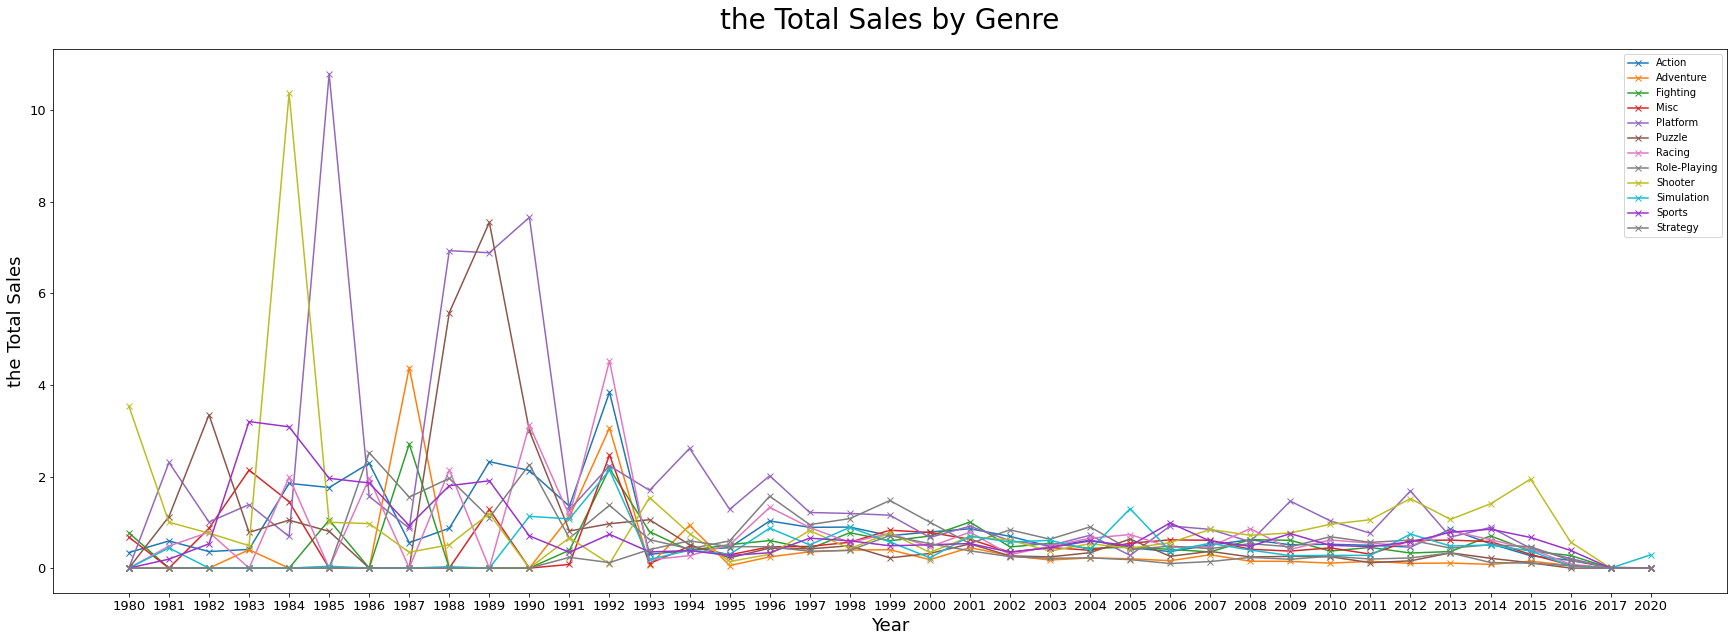

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'darkorchid', 'gray']
plt.figure(figsize=(30, 10))
plt.title('the Total Sales by Genre', fontsize=28, pad=20)
for i, data in enumerate(df2_year2.columns):
    plt.plot(df2_year2.index, df2_year2[data], 'x-', color=colors[i], label=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=18)
plt.ylabel('the Total Sales', fontsize=18)
plt.legend()

plt.show()

In [ ]:
df2_year = pd.crosstab(df2['Year'], df2['Genre'])
df2_year

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,6,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


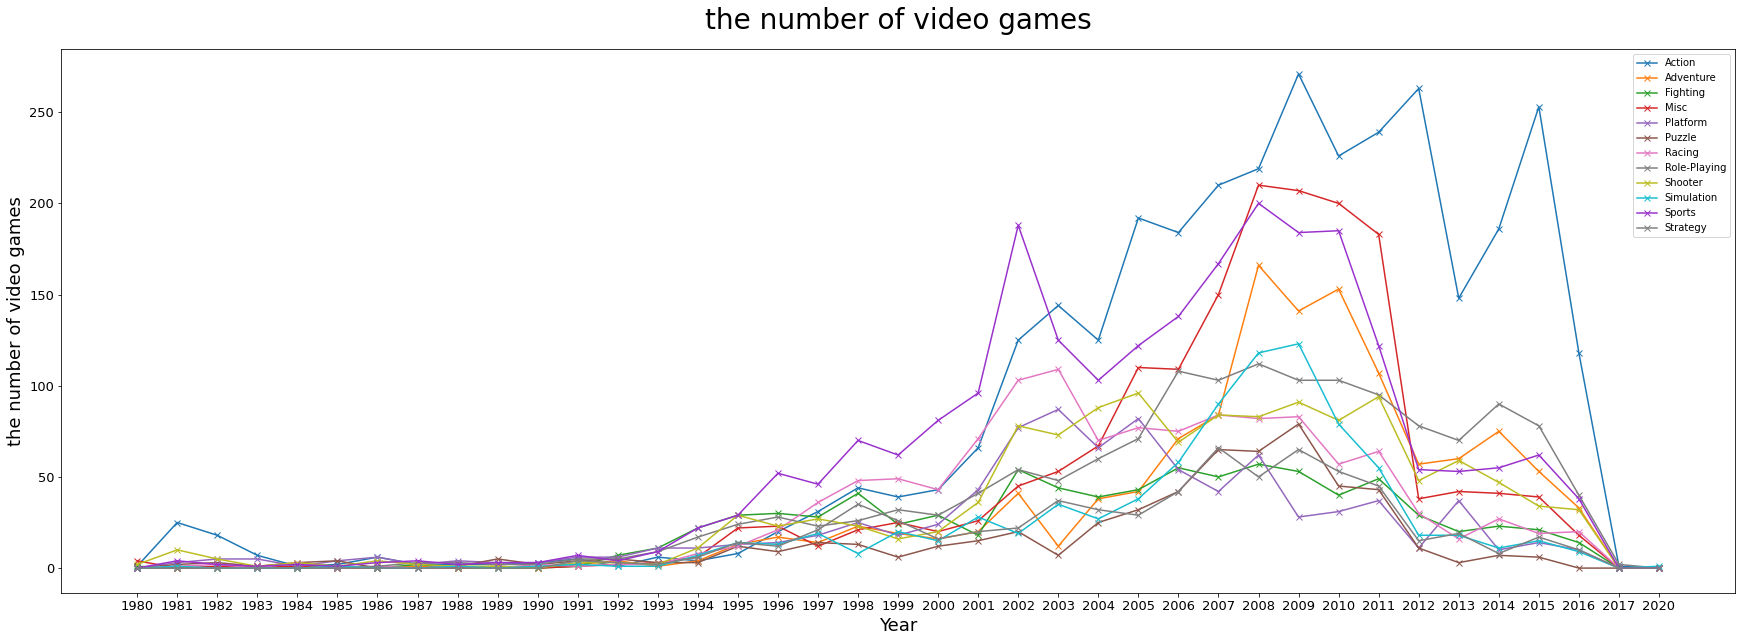

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 'darkorchid', 'gray']
plt.figure(figsize=(30, 10))
plt.title('the number of video games', fontsize=28, pad=20)
for i, data in enumerate(df2_year2.columns):
    plt.plot(df2_year.index, df2_year[data], 'x-', color=colors[i], label=data)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=18)
plt.ylabel('the number of video games', fontsize=18)
plt.legend()

plt.show()

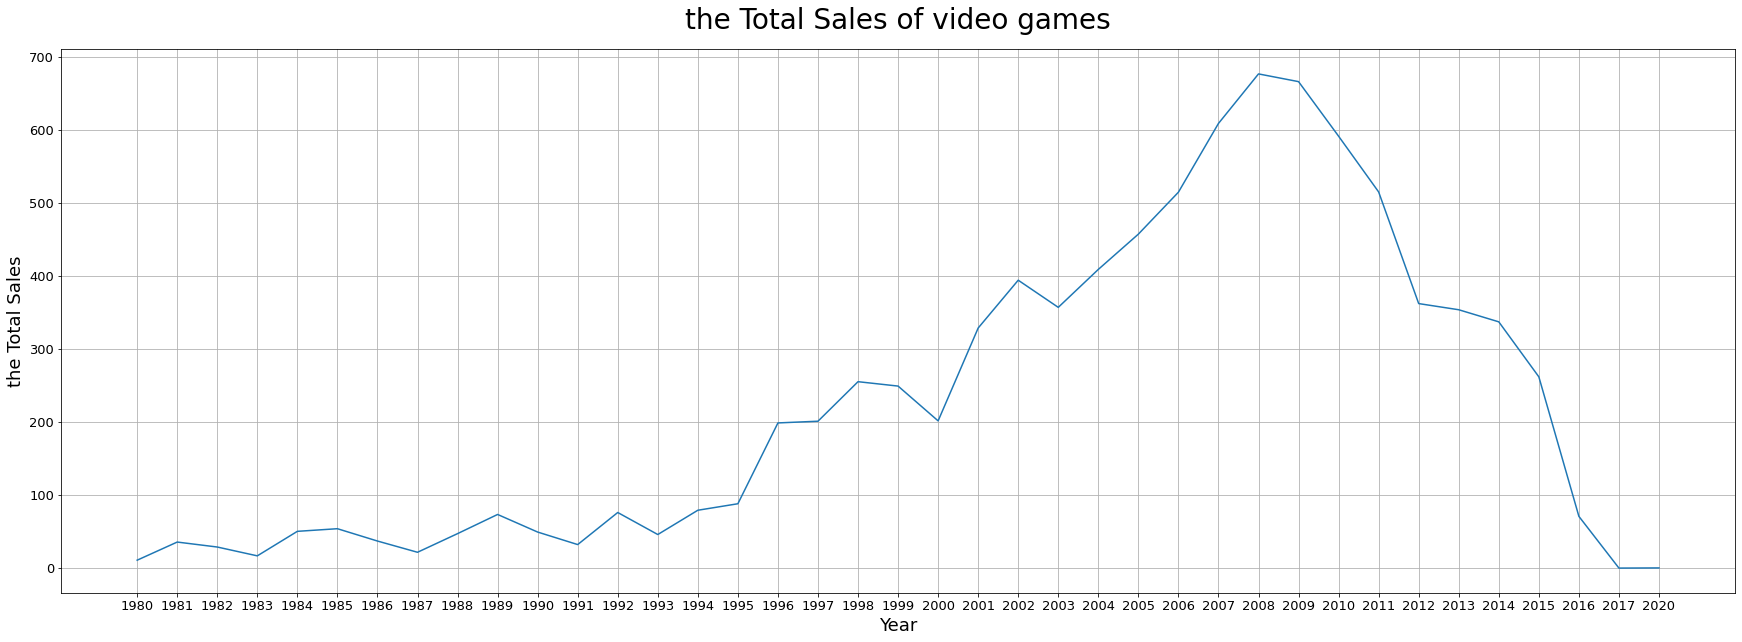

In [ ]:
df2_test = pd.pivot_table(df2, index=['Year'], values='All_Sales', aggfunc='sum')
#df2_test = df2_test.sort_values(by=['Year'])

plt.figure(figsize=(30, 10))
plt.title('the Total Sales of video games', fontsize=28, pad=20)
plt.plot(df2_test.index, df2_test['All_Sales'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year', fontsize=18)
plt.ylabel('the Total Sales', fontsize=18)
plt.grid()

plt.show()